In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Rajesh Gonnade\Downloads\bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

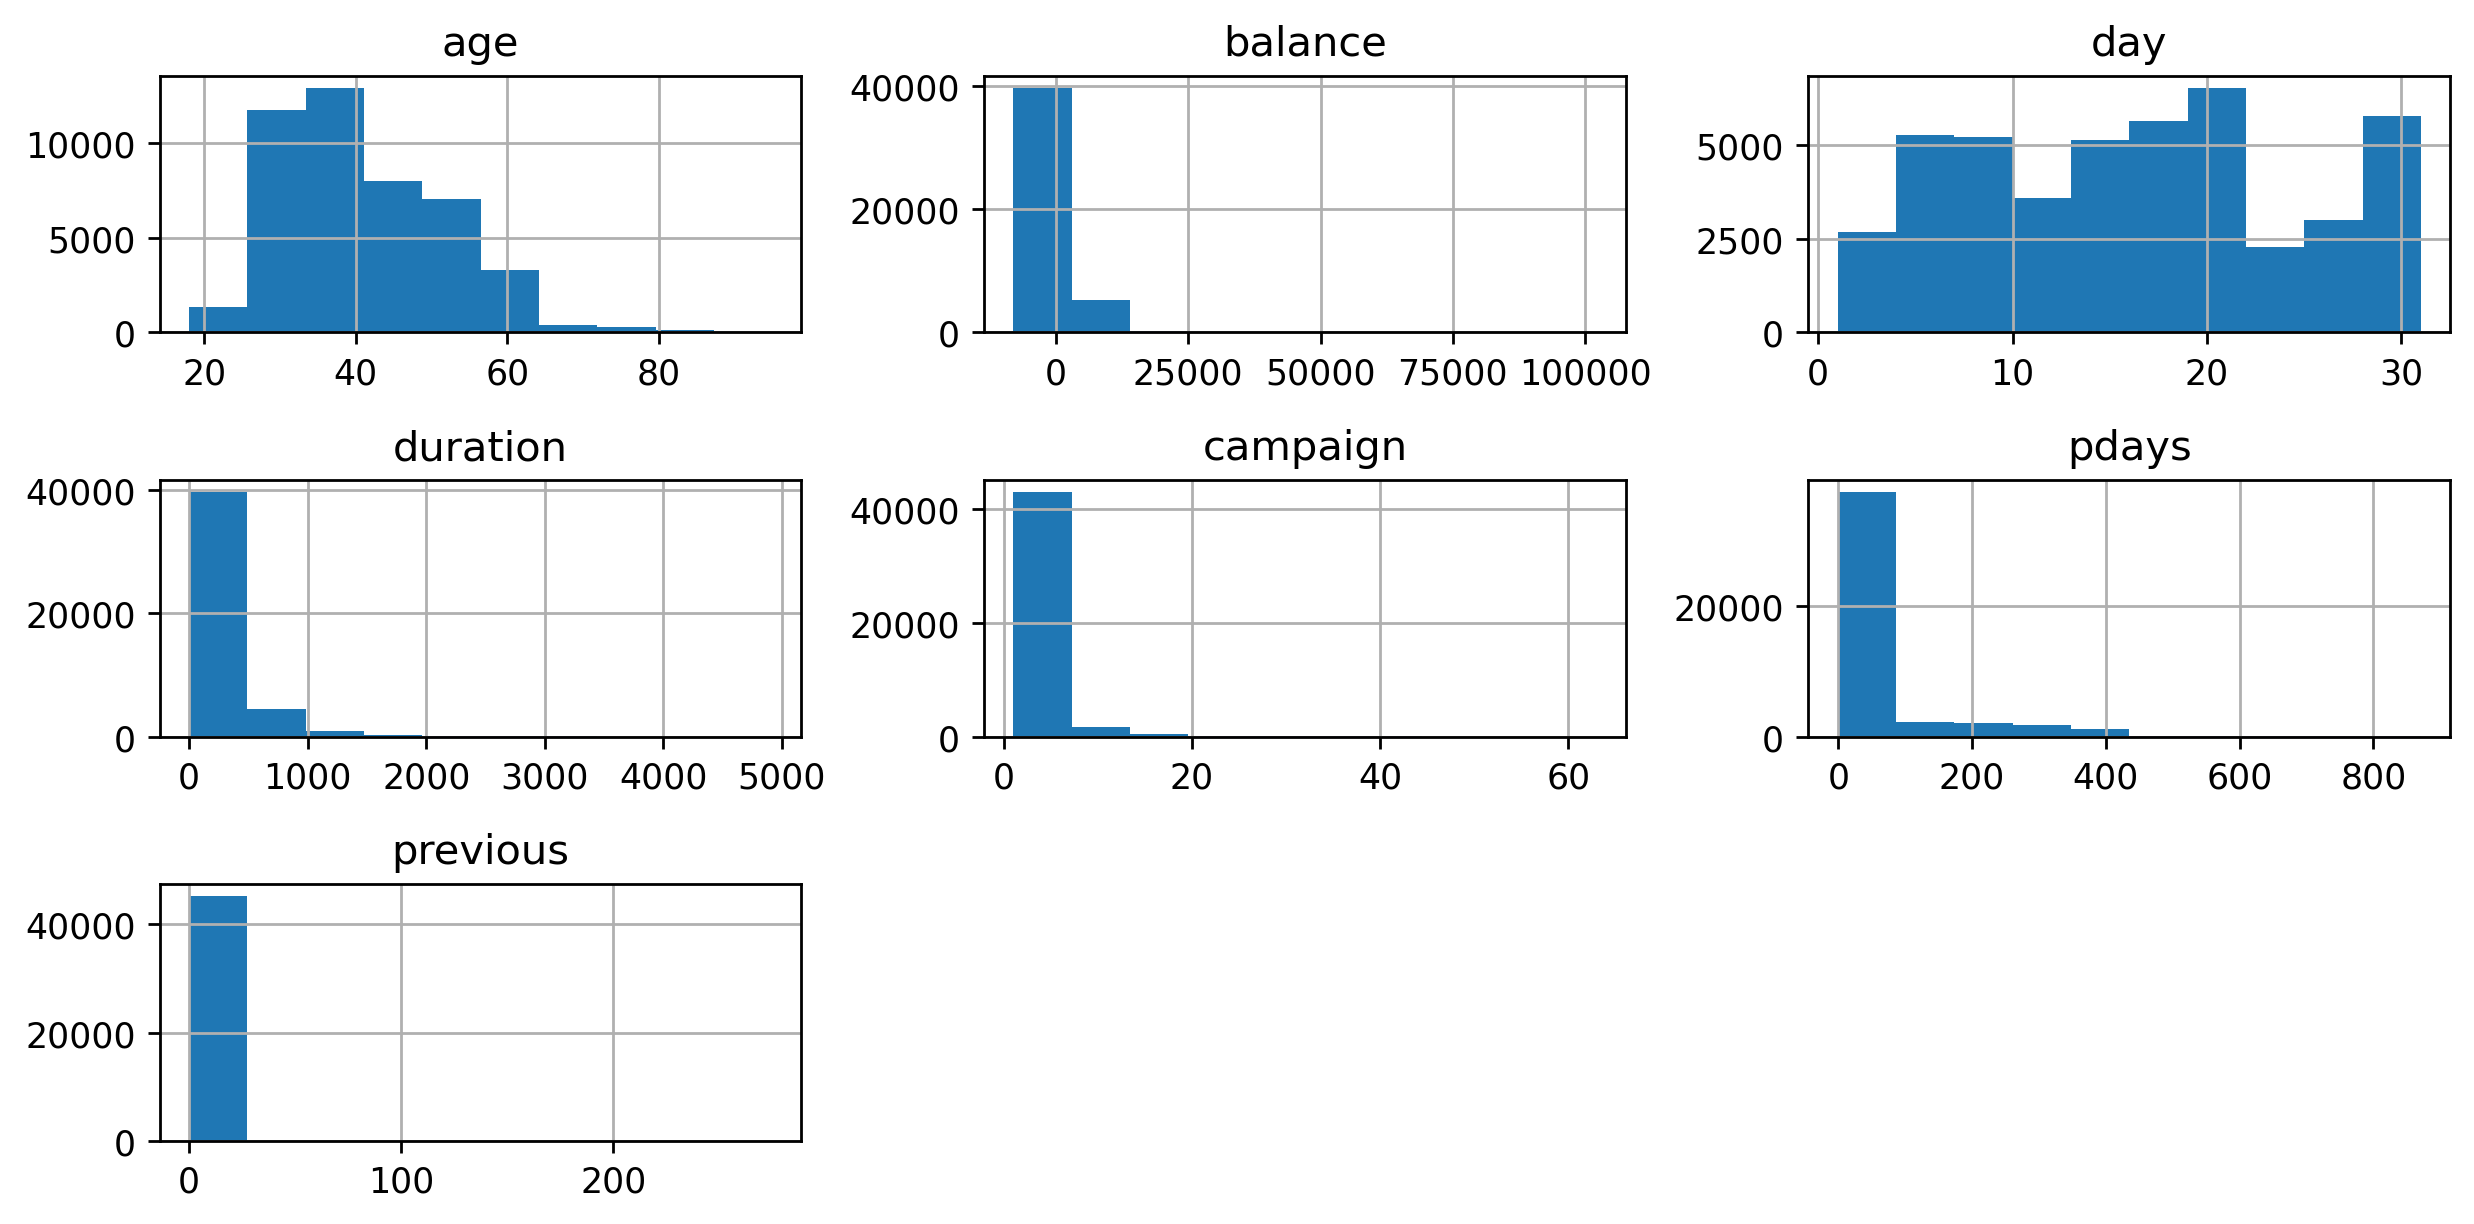

In [9]:
df.hist()
plt.tight_layout()

<AxesSubplot:>

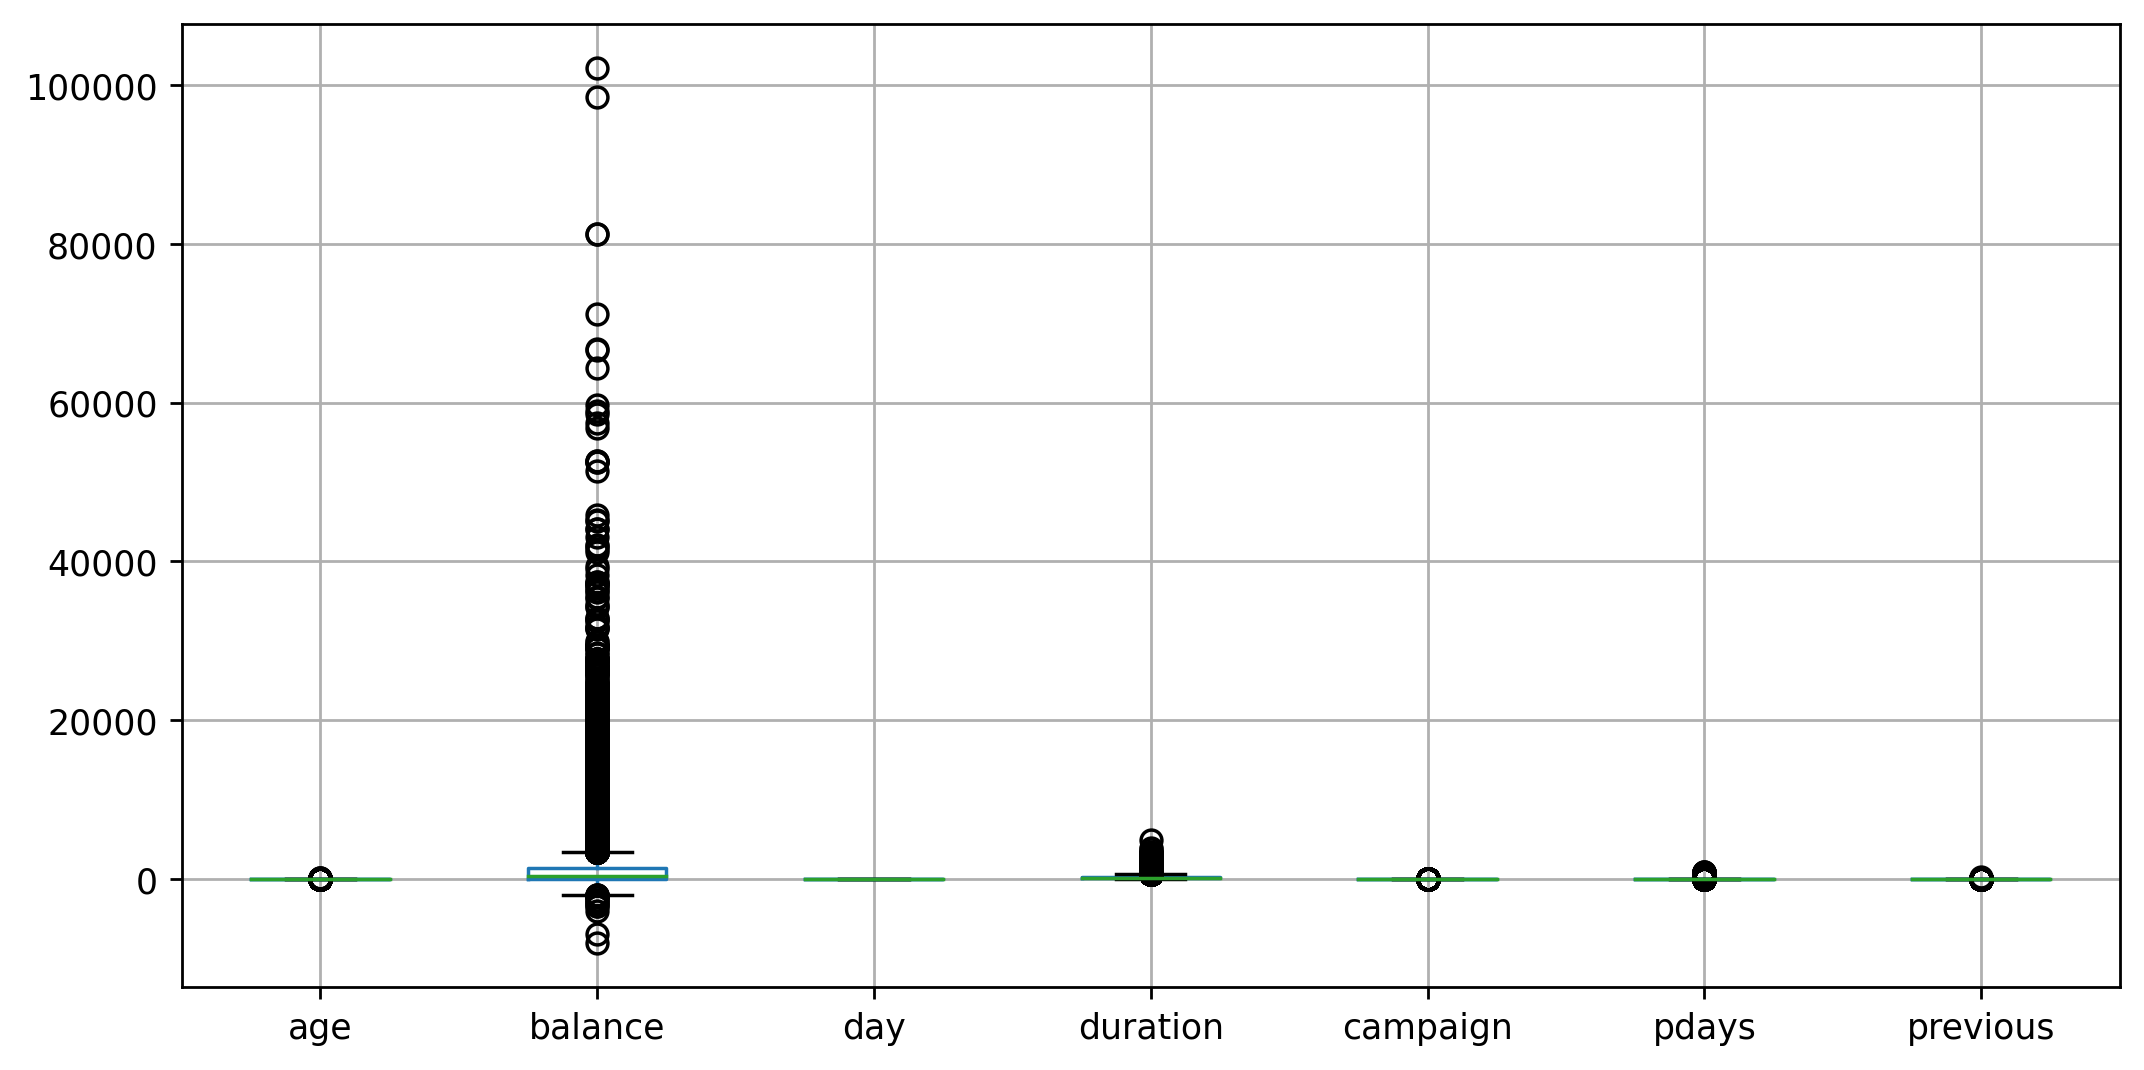

In [10]:
df.boxplot()

In [11]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [12]:
outlier_detection(df,df.columns)

(age           10.5
 balance    -1962.0
 day          -11.5
 duration    -221.0
 campaign      -2.0
 pdays         -1.0
 previous       0.0
 dtype: float64,
 age           70.5
 balance     3462.0
 day           40.5
 duration     643.0
 campaign       6.0
 pdays         -1.0
 previous       0.0
 dtype: float64)

In [13]:
df.loc[df['age'] > 70.5,'age']=70.5
df.loc[df['balance'] > 3462.0,'balance']=3462.0
df.loc[df['duration'] >643.0,'duration']=643.0
df.loc[df['campaign'] > 6.0,'campaign']=6.0
df.loc[df['pdays'] > -1.0,'pdays']=-1.0
df.loc[df['previous'] > 0.0,'previous']=0.0

<AxesSubplot:>

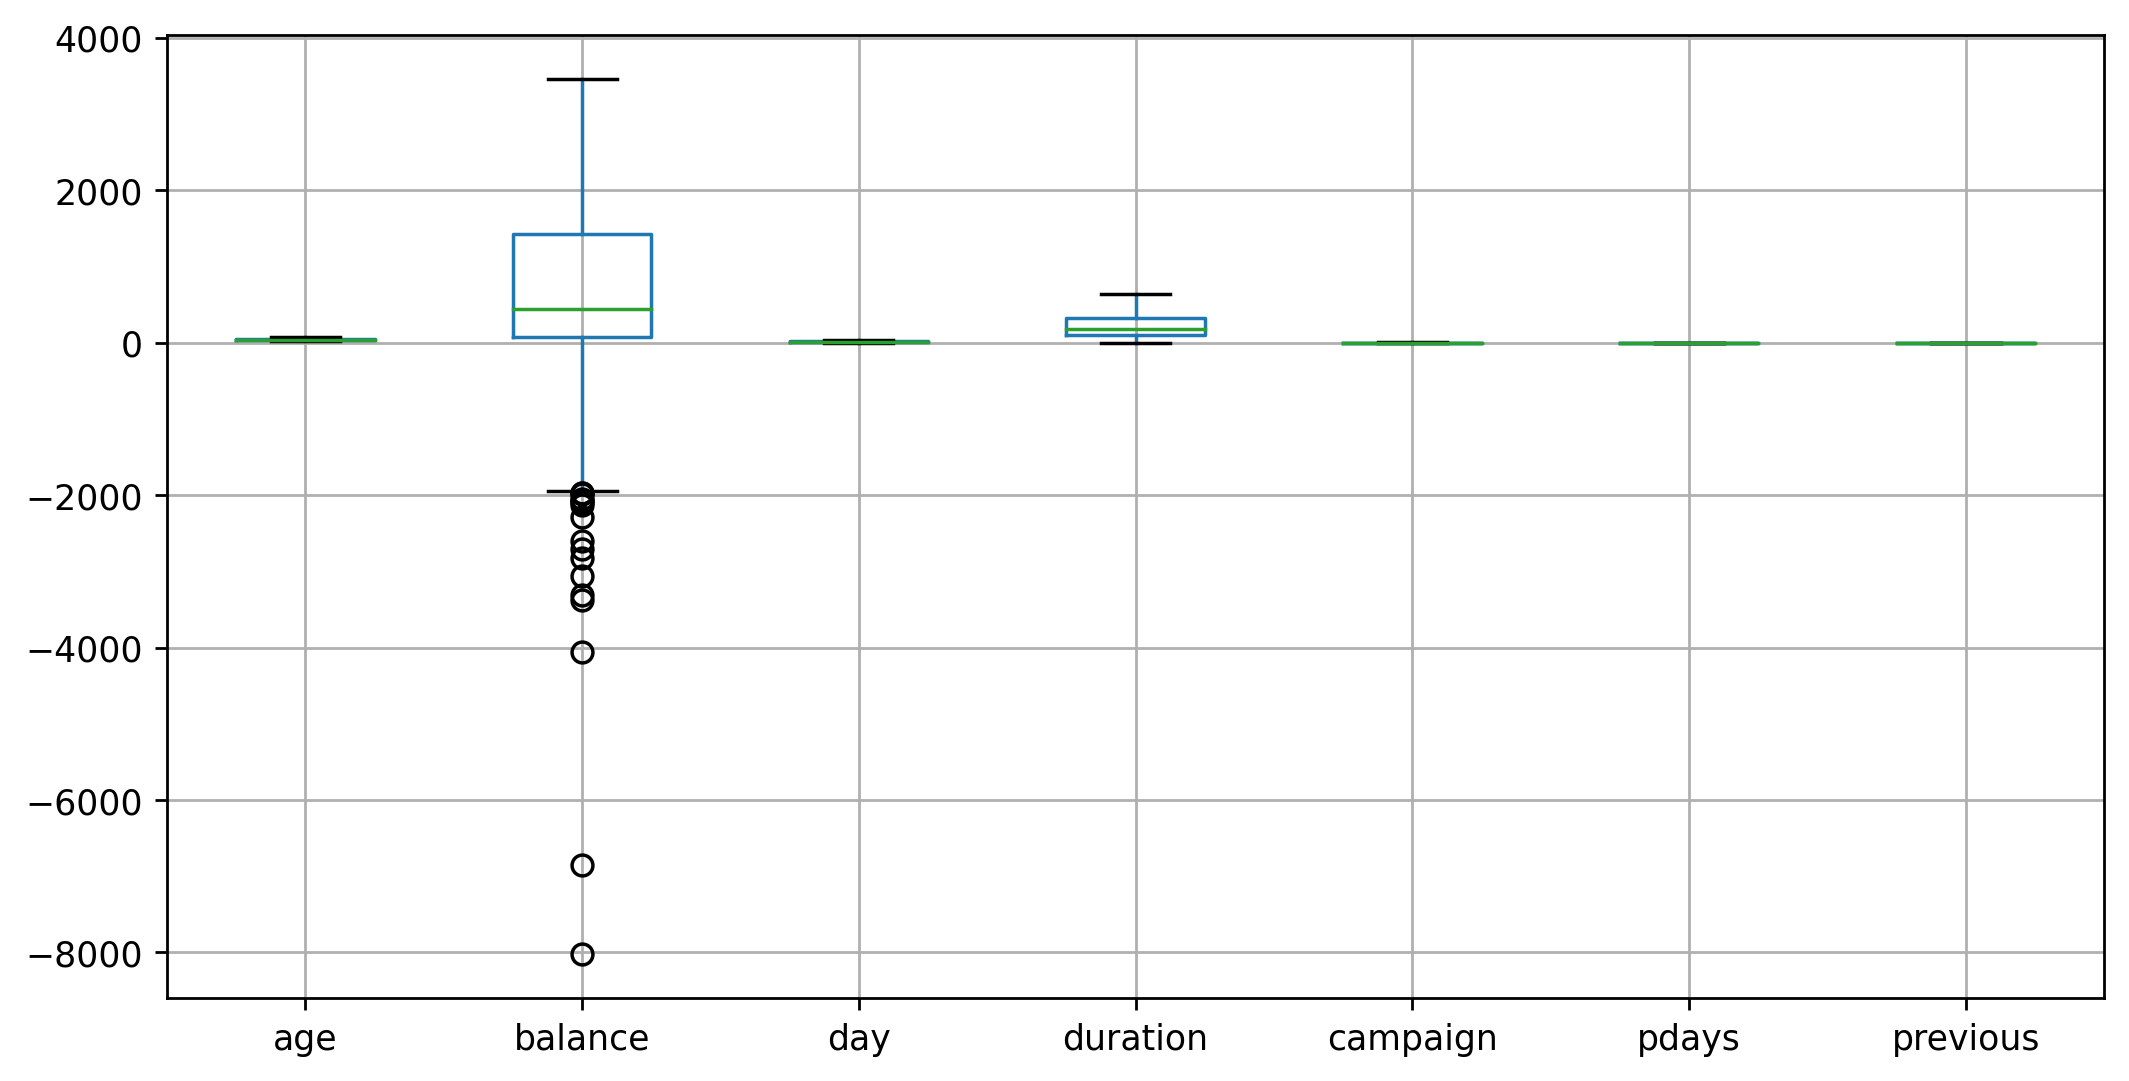

In [14]:
df.boxplot()

In [15]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.121290,-0.008843,-0.014287,0.025791,NaN,NaN
balance,0.121290,1.000000,0.009972,0.041764,-0.026507,NaN,NaN
day,-0.008843,0.009972,1.000000,-0.039285,0.152975,NaN,NaN
duration,-0.014287,0.041764,-0.039285,1.000000,-0.100049,NaN,NaN
campaign,0.025791,-0.026507,0.152975,-0.100049,1.000000,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Encoding

In [17]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [18]:
df[cat_cols]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [19]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47.0,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33.0,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,643,3,-1,0,3.0,1.0
45207,70.5,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1.0
45208,70.5,5.0,1.0,1.0,0.0,3462,0.0,0.0,0.0,17,9.0,643,5,-1,0,2.0,1.0
45209,57.0,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0.0


In [20]:
df.dtypes

age          float64
job          float64
marital      float64
education    float64
default      float64
balance        int64
housing      float64
loan         float64
contact      float64
day            int64
month        float64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome     float64
y            float64
dtype: object

In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44.0,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33.0,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47.0,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33.0,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,643,3,-1,0,3.0,1.0
45207,70.5,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1.0
45208,70.5,5.0,1.0,1.0,0.0,3462,0.0,0.0,0.0,17,9.0,643,5,-1,0,2.0,1.0
45209,57.0,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0.0


# feature selection

In [23]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv

In [24]:
x = df.iloc[:,:-1]
y = df['y']


In [25]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58.0,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0
1,44.0,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0
2,33.0,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0
3,47.0,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0
4,33.0,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,643,3,-1,0,3.0
45207,70.5,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0
45208,70.5,5.0,1.0,1.0,0.0,3462,0.0,0.0,0.0,17,9.0,643,5,-1,0,2.0
45209,57.0,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0


In [26]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45206    1.0
45207    1.0
45208    1.0
45209    0.0
45210    0.0
Name: y, Length: 45211, dtype: float64

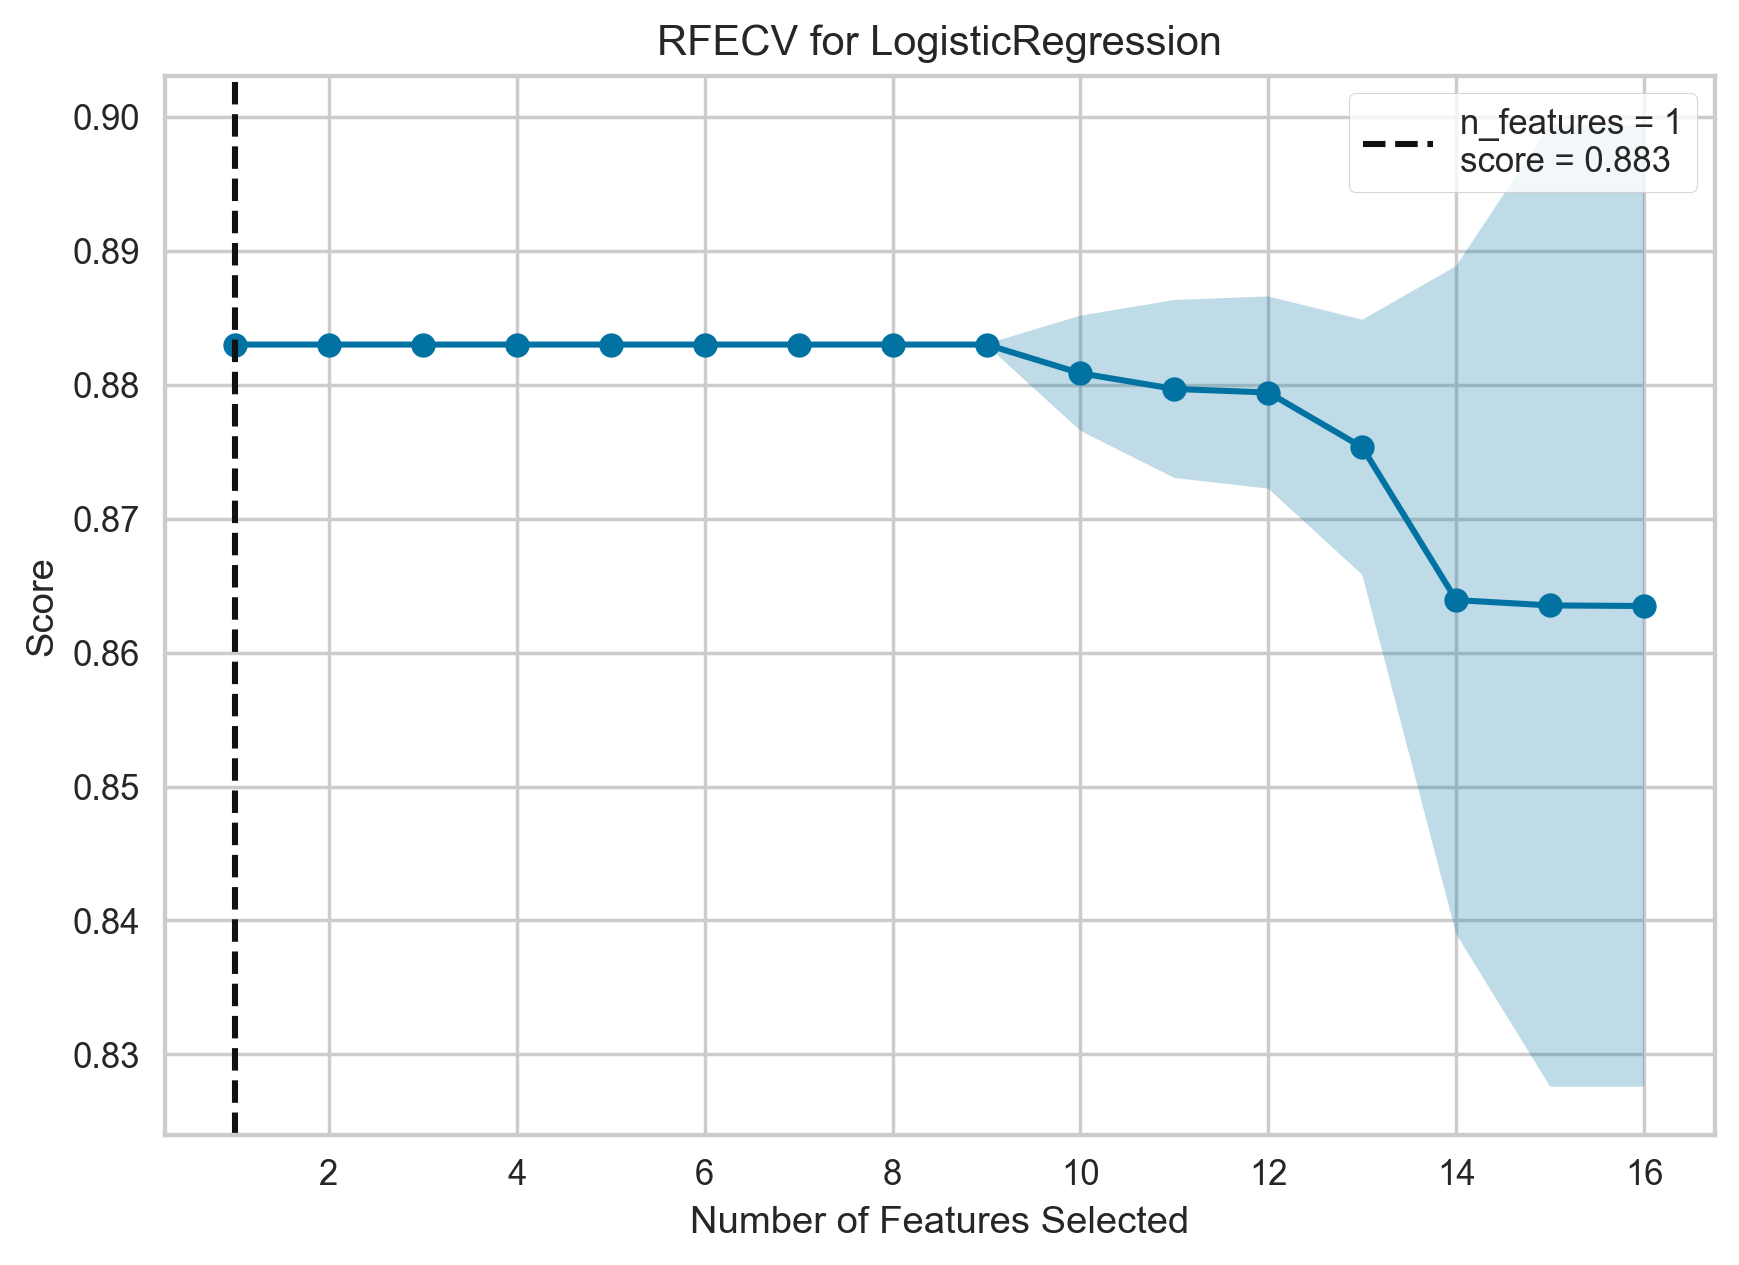

In [27]:
rfe = rfecv(LogisticRegression(),x,y)

In [28]:
rfe.ranking_

array([13, 11,  7,  6,  4, 15,  1,  2,  3, 12, 10, 14,  5,  9, 16,  8])

In [29]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})
rfe_Sel

,Ranking,Features
0,13,age
1,11,job
2,7,marital
3,6,education
4,4,default
5,15,balance
6,1,housing
7,2,loan
8,3,contact
9,12,day


- housing
- loan
- contact
- default
- campaign

In [30]:
#Tree Based method

In [31]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [32]:
dt.feature_importances_

array([0.11615641, 0.04831899, 0.02049867, 0.03029436, 0.00279965,
       0.12083772, 0.0256085 , 0.01104889, 0.02154888, 0.09982352,
       0.11426624, 0.26360289, 0.0425257 , 0.        , 0.        ,
       0.08266958])

In [33]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})
ig_sel

,IG,Features
0,0.116156,age
1,0.048319,job
2,0.020499,marital
3,0.030294,education
4,0.002800,default
5,0.120838,balance
6,0.025609,housing
7,0.011049,loan
8,0.021549,contact
9,0.099824,day


In [34]:
ig_sel.sort_values(by='IG', ascending=False)

,IG,Features
11,0.263603,duration
5,0.120838,balance
0,0.116156,age
10,0.114266,month
9,0.099824,day
15,0.082670,poutcome
1,0.048319,job
12,0.042526,campaign
3,0.030294,education
6,0.025609,housing


- duration 
- balance
- age

In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [36]:
from sklearn.linear_model import LinearRegression, Lasso
l1 = Lasso()
l1.fit(x,y)

Lasso()

In [37]:
l1.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.03904287e-05, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  6.72692947e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [38]:
slope_sel = pd.DataFrame({
    'slope': l1.coef_,
    'Features' : x.columns
})
slope_sel.sort_values(by='slope', ascending=False)

,slope,Features
11,0.000673,duration
5,0.000020,balance
0,0.000000,age
1,0.000000,job
2,0.000000,marital
3,0.000000,education
4,-0.000000,default
6,-0.000000,housing
7,-0.000000,loan
8,-0.000000,contact


In [39]:
'''All feature selection methods are giving different columns'''

'All feature selection methods are giving different columns'

# Model Building

In [41]:
x=df[[ 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'
        ]]
y=df['y']

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(xtrain,ytrain) # it is calculating m and c value
lg.coef_    #it shows all m and c value.

array([[-2.34997202e-02, -5.18156784e-02, -1.87058586e-01,
        -2.02726313e-02, -1.07189546e-02,  1.57261254e-04,
        -4.13764298e-01, -1.20108920e-01, -3.84209169e-01,
        -9.87839996e-03, -2.38560194e-02,  6.09232761e-03,
        -3.02343589e-01,  1.56496505e-01,  0.00000000e+00,
        -3.86489909e-01]])

In [44]:
xtest

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3776,40.0,1.0,1.0,1.0,0.0,580,1.0,0.0,2.0,16,8.0,192,1,-1,0,3.0
9928,47.0,7.0,2.0,1.0,0.0,3462,0.0,0.0,2.0,9,6.0,83,2,-1,0,3.0
33409,25.0,8.0,2.0,2.0,0.0,538,1.0,0.0,0.0,20,0.0,226,1,-1,0,3.0
31885,42.0,4.0,1.0,2.0,0.0,1773,0.0,0.0,0.0,9,0.0,311,1,-1,0,0.0
15738,56.0,4.0,1.0,2.0,0.0,217,0.0,1.0,0.0,21,5.0,121,2,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,47.0,4.0,1.0,2.0,0.0,1890,0.0,0.0,0.0,8,5.0,161,1,-1,0,3.0
38732,32.0,1.0,2.0,1.0,0.0,217,1.0,0.0,0.0,15,8.0,643,3,-1,0,3.0
5654,52.0,0.0,0.0,1.0,0.0,0,1.0,0.0,2.0,26,8.0,206,1,-1,0,3.0
3779,40.0,0.0,0.0,1.0,0.0,783,1.0,1.0,2.0,16,8.0,171,2,-1,0,3.0


In [45]:
ypred = lg.predict(xtest)
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
print(ytest[:25].values) #Actual
print(ypred[:25]) #Predicted

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      7952
         1.0       0.49      0.20      0.29      1091

    accuracy                           0.88      9043
   macro avg       0.70      0.59      0.61      9043
weighted avg       0.85      0.88      0.86      9043



In [49]:
# The overall accuracy of the model is 0.88, meaning that 88% of the data points were correctly classified by the model.
'''
Precision : 90% the client has not subscribed a term deposit.
            and  48% the client has subscribed a term deposit.
Recall : 97% the client has not subscribed a term deposit.
        19% the client has subscribed a term deposit.
'''

'\nPrecision : 90% the client has not subscribed a term deposit.\n            and  48% the client has subscribed a term deposit.\nRecall : 97% the client has not subscribed a term deposit.\n        19% the client has subscribed a term deposit.\n'